<a href="https://colab.research.google.com/github/SachinBiswas7/Breast-Cancer-Classification/blob/main/02_Breast_cancer_classification_using_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project - Breast Cancer Classification using Deep Neural Network**

##Welcome to this breast cancer classification project. We'll be exploring various machine learning algorithms and a deep neural network to classify breast cancer.

1. **Define Packages and Load Data**:
   - Import necessary libraries and load the breast cancer dataset.

2. **Data Preprocessing**:
   - Perform visualization to gain insights into the data.
   - Split the data into training and testing sets.

3. **Model Evaluation**:
   - Evaluate the performance of different machine learning algorithms.
   - Evaluate the performance of the deep neural network model.

4. **Comparison**:
   - Compare the performance metrics of various machine learning algorithms and the deep neural network to determine the most effective approach for breast cancer classification.










#Step 1: Define Packages and Load Data








###The following code imports key libraries for data analysis and visualization. Pandas handles data manipulation, Matplotlib and Seaborn create various types of plots, and NumPy supports numerical operations and array handling.



In [ ]:
import pandas as pd  # For data manipulation and analysis
from matplotlib import pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For making statistical graphics and data visualization
import numpy as np  # For numerical operations and handling arrays


##Load Data

### This line of code reads a CSV file named "main.csv" into a DataFrame called `df`, using the value in the 32nd column as the index for the DataFrame.

In [ ]:
df = pd.read_csv("main.csv",index_col=32)

In [ ]:
print(df.describe().T)   # Print the descriptive statistics of the DataFrame `df`

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

#Step 2:Data preproccesing

### As part of the data processing, the next step involves identifying missing values in the dataset. The following code will print the number of missing values in each column of the DataFrame df, helping to pinpoint any columns with incomplete data.

In [ ]:
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### The next steps involve renaming and restructuring columns as well as examining the data types. The code will rename the 'diagnosis' column to 'Label' and then drop the original 'diagnosis' column.

In [ ]:
# Rename 'Diagnosis' column to 'Label'
df['Label'] = df['diagnosis']
df = df.drop(columns=['diagnosis'])

# Print data types of columns
print(df.dtypes)


id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

##Visualization
###To better understand the distribution of the target labels, a count plot can be created using Seaborn. This visualization will show the frequency of each class in the 'Label' column, with 'M' indicating malignant and 'B' indicating benign cases. This simple snippet will enhance the visual appeal of the data analysis and provide clear insights into the class distribution.

<Axes: xlabel='Label', ylabel='count'>

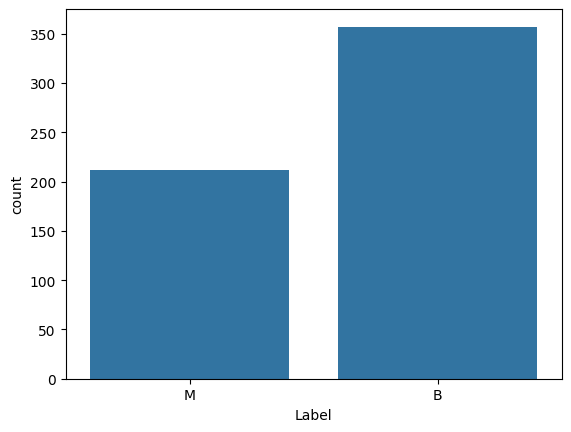

In [ ]:
#Understand the data
sns.countplot(x="Label", data=df) #M - malignant   B - benign

###To proceed with the data preprocessing, categorical values need to be converted into numerical values. The following steps will achieve this:


1.   Print the distribution of the data in the 'Label' column to understand the frequency of each class.
2.   Define the dependent variable y that contains the labels to be predicted.
Print the unique labels before encoding to show their original categorical form.

1.   Encode the categorical labels ('B' for benign and 'M' for malignant) into numerical values (0 and 1) using LabelEncoder from Scikit-learn.
2.  Print the unique labels after encoding to confirm the conversion.




In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  Label
B    357
M    212
Name: count, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


### Define the independent variables X, excluding the 'Label' and 'id' columns.


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "id"], axis=1)
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

###To ensure consistency in the range of values across independent variables, the following steps will be taken



*   Import the MinMaxScaler from Scikit-learn to scale or normalize the data.


*   Fit the scaler to the independent variables X.
*   Transform the independent variables using the fitted scaler to bring them to a similar range.


In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


##Spliting Data
###To verify the accuracy of the model after fitting, the dataset will be split into training and testing sets.

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


###To standardize the features by removing the mean and scaling to unit variance, the StandardScaler from Scikit-learn will be utilized

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Step 3:Model Evaluation

##Machine Learning Models
###Next step to defines a function called `models`, which is intended to train various classifiers and evaluate their performance on a breast cancer classification task. The classifiers include Logistic Regression, K Nearest Neighbor, Decision Tree Classifier, Gaussian Naive Bayes, Random Forest Classifier, and Support Vector Machine (Linear Classifier). After training, each classifier will be tested on the test data to calculate performance metrics such as accuracy, precision, recall, and F1 score. The confusion matrix for each classifier will also be plotted as a heatmap for visual assessment of classification results. This comprehensive analysis aims to aid in selecting the most suitable model for the given dataset.

[0] Logistic Regression Training Accuracy: 0.99
[1] K Nearest Neighbor Training Accuracy: 0.98
[2] Decision Tree Classifier Training Accuracy: 1.00
[3] Gaussian Naive Bayes Training Accuracy: 0.94
[4] Random Forest Classifier Training Accuracy: 1.00
[5] Support Vector Machine (Linear Classifier) Training Accuracy: 0.99
Confusion Matrix for Logistic Regression:
[[87  2]
 [ 1 53]]
Logistic Regression Testing Accuracy = 0.9790
Logistic Regression Precision = 0.9636
Logistic Regression Recall = 0.9815
Logistic Regression F1 Score = 0.9725



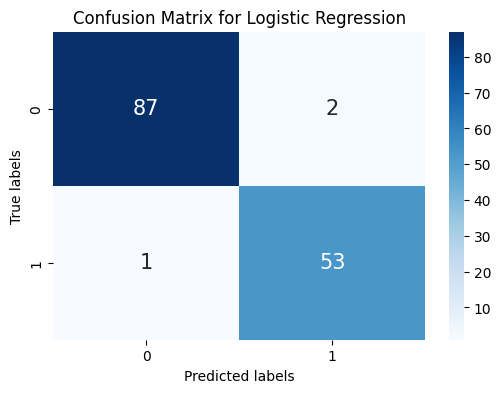

Confusion Matrix for K Nearest Neighbor:
[[86  3]
 [ 3 51]]
K Nearest Neighbor Testing Accuracy = 0.9580
K Nearest Neighbor Precision = 0.9444
K Nearest Neighbor Recall = 0.9444
K Nearest Neighbor F1 Score = 0.9444



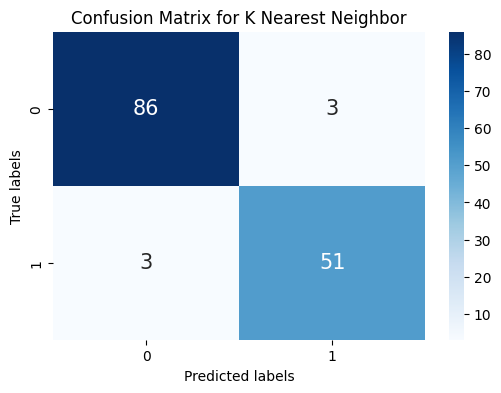

Confusion Matrix for Decision Tree Classifier:
[[87  2]
 [ 4 50]]
Decision Tree Classifier Testing Accuracy = 0.9580
Decision Tree Classifier Precision = 0.9615
Decision Tree Classifier Recall = 0.9259
Decision Tree Classifier F1 Score = 0.9434



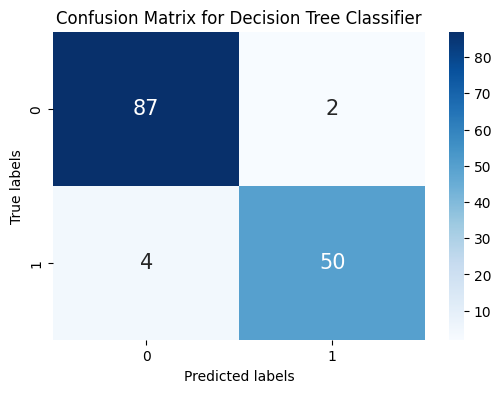

Confusion Matrix for Gaussian Naive Bayes:
[[85  4]
 [ 3 51]]
Gaussian Naive Bayes Testing Accuracy = 0.9510
Gaussian Naive Bayes Precision = 0.9273
Gaussian Naive Bayes Recall = 0.9444
Gaussian Naive Bayes F1 Score = 0.9358



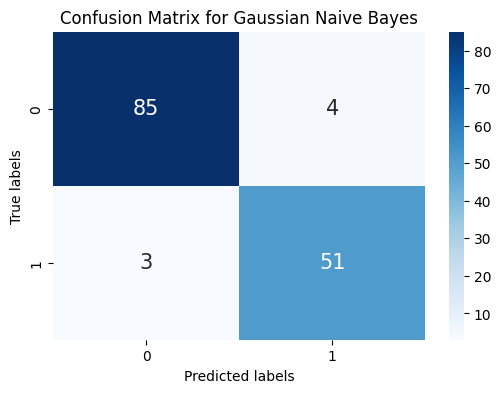

Confusion Matrix for Random Forest Classifier:
[[88  1]
 [ 3 51]]
Random Forest Classifier Testing Accuracy = 0.9720
Random Forest Classifier Precision = 0.9808
Random Forest Classifier Recall = 0.9444
Random Forest Classifier F1 Score = 0.9623



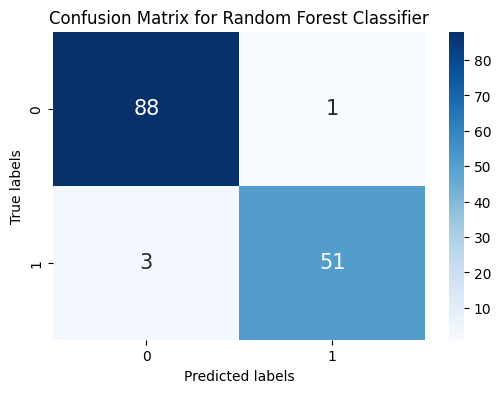

Confusion Matrix for Support Vector Machine (Linear Classifier):
[[87  2]
 [ 2 52]]
Support Vector Machine (Linear Classifier) Testing Accuracy = 0.9720
Support Vector Machine (Linear Classifier) Precision = 0.9630
Support Vector Machine (Linear Classifier) Recall = 0.9630
Support Vector Machine (Linear Classifier) F1 Score = 0.9630



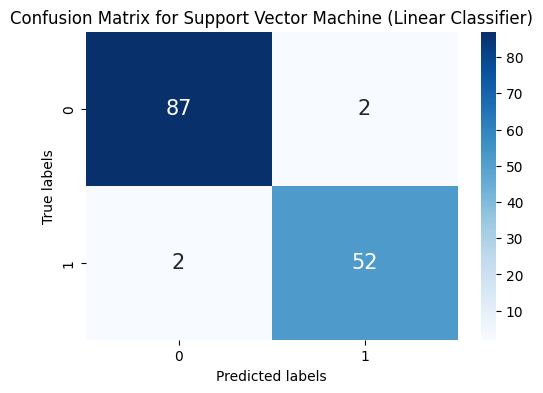

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

def models(X_train, y_train):
    # Import necessary libraries for different classifiers
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC

    # Initialize all models with their respective hyperparameters
    log = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    gauss = GaussianNB()
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    svc_lin = SVC(kernel='linear', random_state=0)

    # List of all models
    models = [log, knn, tree, gauss, forest, svc_lin]
    # Corresponding names of the models
    model_names = [
        'Logistic Regression',
        'K Nearest Neighbor',
        'Decision Tree Classifier',
        'Gaussian Naive Bayes',
        'Random Forest Classifier',
        'Support Vector Machine (Linear Classifier)'
    ]

    # Train each model using the training data
    for model in models:
        model.fit(X_train, y_train)

    # Print the training accuracy for each model
    for i, model in enumerate(models):
        print(f'[{i}] {model_names[i]} Training Accuracy: {model.score(X_train, y_train):.2f}')

    return models, model_names

# Ensure that mdl and model_names are correctly retrieved by calling the models function
mdl, model_names = models(X_train, y_train)

# Test each model and print the results
for i, model in enumerate(mdl):
    try:
        # Predict the test set results
        y_pred = model.predict(X_test)

        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        # Calculate recall score
        recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
        # Calculate precision score
        precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

        # Calculate accuracy
        accuracy = (cm[0][0] + cm[1][1]) / cm.sum()

        # Print the confusion matrix and other metrics
        print(f'Confusion Matrix for {model_names[i]}:')
        print(cm)
        print(f'{model_names[i]} Testing Accuracy = {accuracy:.4f}')
        print(f'{model_names[i]} Precision = {precision:.4f}')
        print(f'{model_names[i]} Recall = {recall:.4f}')
        print(f'{model_names[i]} F1 Score = {f1:.4f}')
        print()  # Print a new line for better readability

        # Plot the heatmap of the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15})
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix for {model_names[i]}')
        plt.show()

    except Exception as e:
        # Print any errors encountered during the process
        print(f'Error with {model_names[i]} - Model[{i}]: {e}')


##Deep Learning Models



###Imports necessary modules from Keras to build a neural network model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

### Create model consists of two fully connected layers (Dense) with Rectified Linear Unit (ReLU) activation function, followed by a dropout layer to prevent overfitting. The output layer consists of a single neuron with a sigmoid activation function, suitable for binary classification tasks. The model is compiled with binary cross-entropy loss function and the Adam optimizer.

In [ ]:
model = Sequential()
model.add(Dense(14, input_dim=30, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=40,
                    validation_data=(X_test, y_test))


Epoch 1/100
11/11 [==============================] - 3s 23ms/step - loss: 0.8501 - accuracy: 0.5329 - val_loss: 0.7143 - val_accuracy: 0.6084
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7456 - accuracy: 0.5634 - val_loss: 0.5741 - val_accuracy: 0.7343
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6277 - accuracy: 0.6761 - val_loss: 0.4752 - val_accuracy: 0.7902
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5573 - accuracy: 0.7277 - val_loss: 0.4046 - val_accuracy: 0.8601
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4762 - accuracy: 0.7700 - val_loss: 0.3532 - val_accuracy: 0.8741
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4290 - accuracy: 0.8310 - val_loss: 0.3159 - val_accuracy: 0.8881
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.3583 - accuracy: 0.8568 - val_loss: 0.2860 - val_accuracy: 0.9371
Epoch 8/100


###Plots the training and validation accuracy and loss  of model training.

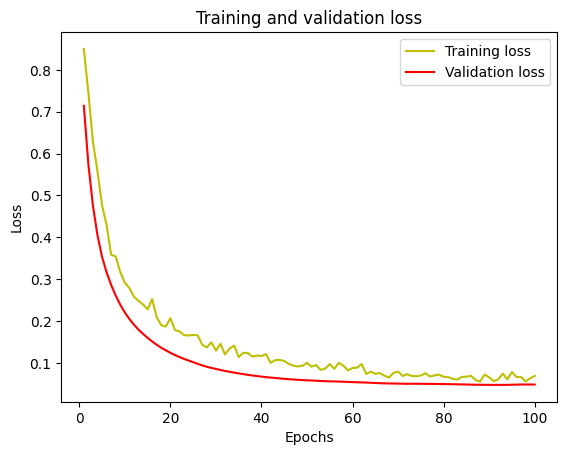

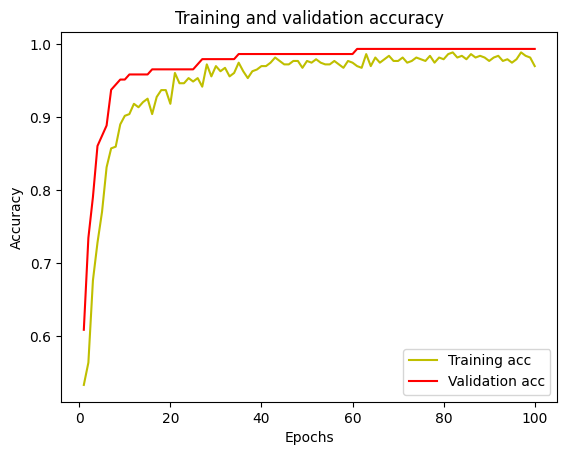

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Predicts test set results using a neural network model, calculates evaluation metrics including accuracy, precision, recall, and F1 score, and visualizes the confusion matrix as a heatmap.

5/5 [==============================] - 0s 3ms/step
Accuracy: 0.9930
Precision: 1.0000
Recall: 0.9815
F1 Score: 0.9907


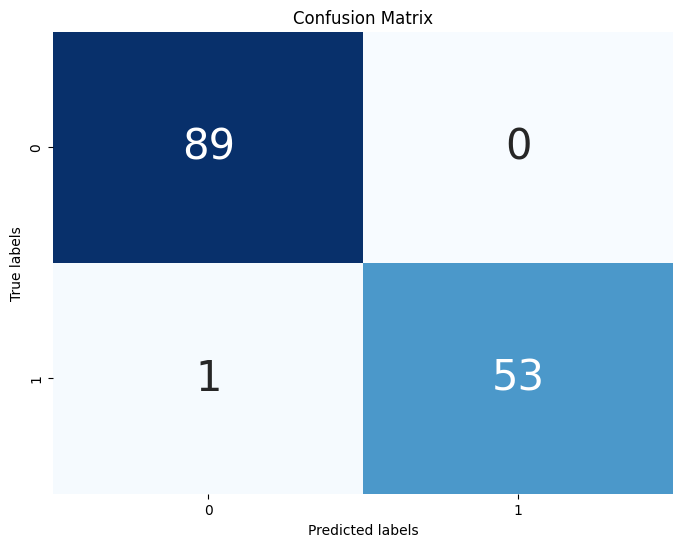

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the Confusion Matrix as a heatmap with larger annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 30})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#Step 4:Comparison of  performance

### Plot the training and testing accuracies of different machine learning models, including Logistic Regression, K Nearest Neighbor, Decision Tree Classifier, Gaussian Naive Bayes, Random Forest Classifier, Support Vector Machine (Linear Classifier), and a proposed method (Multilayer Perceptron). The accuracies are represented as bars, with blue bars indicating training accuracy and green bars representing testing accuracy. The percentage accuracy values are displayed on top of each bar. The plot provides a visual comparison of the performance of various models in terms of accuracy.

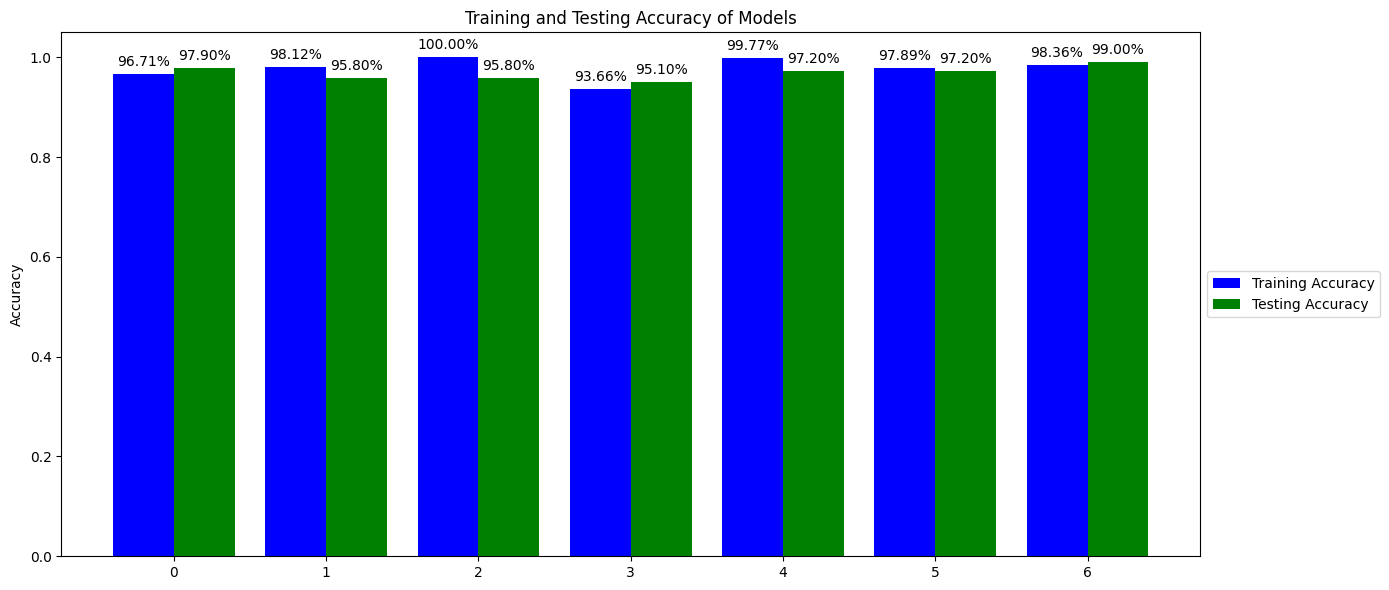

In [ ]:
import matplotlib.pyplot as plt

# Training accuracies
train_accuracies = [0.9671361502347418, 0.9812206572769953, 1.0, 0.9366197183098591, 0.9976525821596244, 0.9788732394366197, 0.9836]

# Testing accuracies
test_accuracies = [0.9790209790209791, 0.958041958041958, 0.958041958041958, 0.951048951048951, 0.972027972027972, 0.972027972027972, 0.993]

# Model names
model_names = [
    'Logistic Regression',
    'K Nearest Neighbor',
    'Decision Tree Classifier',
    'Gaussian Naive Bayes',
    'Random Forest Classifier',
    'Support Vector Machine (Linear Classifier)',
    'Proposed Method (Multilayer Perceptron)'
]

# Plotting
plt.figure(figsize=(14, 6))

# Plot training accuracy
bars_train = plt.bar([i - 0.2 for i in range(len(train_accuracies))], train_accuracies, width=0.4, color='blue', label='Training Accuracy')

# Plot testing accuracy
bars_test = plt.bar([i + 0.2 for i in range(len(test_accuracies))], test_accuracies, width=0.4, color='green', label='Testing Accuracy')

# Adding labels and title

plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Models')


# Adding accuracy rate on top of each bar
for bars, accuracies in zip([bars_train, bars_test], [train_accuracies, test_accuracies]):
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, '{:.2f}%'.format(acc * 100),
                 ha='center', va='bottom')

# Adding legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
